##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

[10.20502391]
1.1995919394798307
[1.13728059]
53.772072308095375


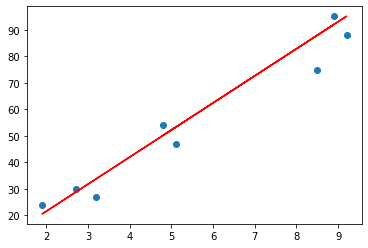

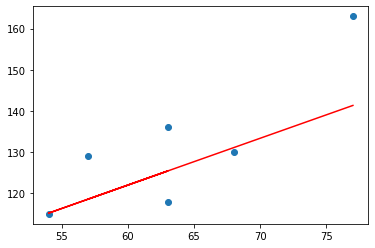

In [1]:
# https://nickmccullum.com/python-machine-learning/linear-regression-python/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Wczytanie pliku i wyświetlenie oryginalnej tablicy
direction = "SCORES.csv"

def prediction(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print(model.coef_)
    print(model.intercept_)
    pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
    y_pred = model.predict(x_test)
    plt.figure()
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, 'r')
    # plt.hist(y_test - predictions)
    metrics.mean_absolute_error(y_test, y_pred)
    metrics.mean_squared_error(y_test, y_pred)
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    
scores = pd.read_csv(direction)    
x = scores[['Hours']]
y = scores['Scores']
prediction(x, y)

direction = "SBP.csv"
sbp = pd.read_csv(direction)  
sbp

x = sbp[['Age']]
y = sbp['SBP']
prediction(x, y)

# W drugim przypadku wyniki są znacznie gorsze, co było powodowane rozrzutem danych, 
# niemniej nadal akceptowalne

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

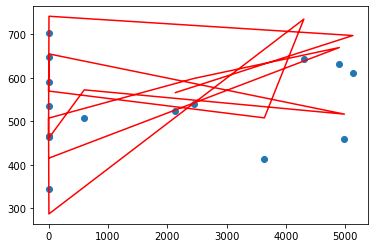

In [107]:
direction = "PETROL.csv"
petrol = pd.read_csv(direction)  
petrol

x = petrol[['Podatek_paliwowy','Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy']]
y = petrol['Zuzycie_paliwa']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
y_pred = model.predict(x_test)
plt.figure()
x_test = x_test.values
x_test = x_test.reshape(4,-1)

plt.scatter(x_test[0, :], y_test, )
plt.plot(x_test[0,:], y_pred, 'r')
plt.hist(y_test - predictions)
metrics.mean_absolute_error(y_test, y_pred)
metrics.mean_squared_error(y_test, y_pred)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Odnosi się wrażenie iż funkcja ta ze względu na zbyt dużą ilość predykatorów nie potrafi 
# jednoznacznie określić predykcji, jeżeli zastosuje się jedynie jeden predykator, 
# wówczas wszystko wraca do normy

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

C:\tools\Anaconda3\envs\Adrian\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


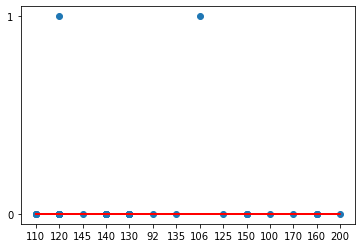

In [89]:
from sklearn.linear_model import LogisticRegression
direction = "HEART.csv"
heart = pd.read_csv(direction)  
heart = heart.replace('?', np.nan)
length = heart.shape

heart = heart.dropna(axis='columns', thresh = np.floor(length[0]/2))
heart = heart.dropna(axis='rows', how = 'any')

heart_ = pd.get_dummies(heart[['restecg','cp']], prefix='dummy')
heart = pd.concat([heart, heart_], axis=1, join="inner")
heart

X = heart['trestbps']
y = heart[['fbs']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train = X_train.values
X_train = X_train.reshape(1,-1)
y_train = y_train.values
y_train = y_train.reshape(1,-1)
X_test = X_test.values
X_test = X_test.reshape(1,-1)

logreg = LogisticRegression()
logreg.fit(X_train.T, y_train.T)
y_pred=logreg.predict(X_test.T)
plt.scatter(X_test[0, :], y_test.fbs)
plt.plot(X_test[0, :], y_pred, 'r')
